In [133]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

# Prelims

In [134]:
df = pd.read_csv('../raw_data/output2_clean.csv', sep=',')
df = df.loc[df['_t:model']=='b1',:].transpose()
df = df.iloc[1:15,:].astype('float64')
df

,0
_t:_cons,0.006520
/:gamma,0.115084
_t:60.AC,1.146501
_t:61.AC,1.077483
_t:62.AC,1.071859
_t:63.AC,1.046495
_t:64.AC,1.085293
_t:65b.AC,1.000000
_t:1926.coh,1.240706
_t:1930.coh,1.135611


In [135]:
pars = df[0].values
gamma = pars[1]
beta = np.zeros(13,dtype='float64')
beta[0] = np.log(pars[0])
for p in range(2,len(pars)):
	beta[p-1] = np.log(pars[p])
gamma, beta

(0.1150843,
 array([-5.03291158,  0.1367147 ,  0.07462777,  0.06939452,  0.04544649,
         0.08185   ,  0.        ,  0.21568057,  0.12717083,  0.03143374,
         0.        , -0.04666633, -0.08848756]))

In [136]:
def hx(age, claim_age, cohort, gamma, beta):
	t = age - 65
	base = np.exp(t*gamma) * np.exp(beta[0])
	i = 1
	for c in range(60,66):
		if claim_age==c:
			base *= np.exp(beta[i])
			exit 
		i +=1 
	i = 7
	for b in [1925,1930,1935,1940,1945,1950]:
		if cohort==b: 
			base *= np.exp(beta[i])
			exit 
		i +=1 
	return base 

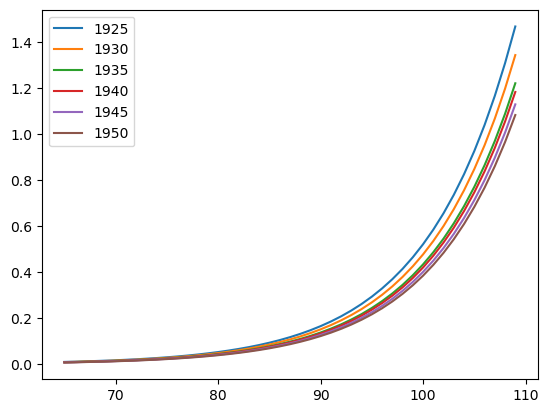

In [137]:
ages = np.arange(65,110)
cohorts = [1925,1930,1935,1940,1945,1950]
plt.figure()
for b in cohorts:
	hxs = [hx(t,60,b,gamma,beta) for t in ages]
	plt.plot(ages,hxs,label=str(b))
plt.legend()
plt.show()

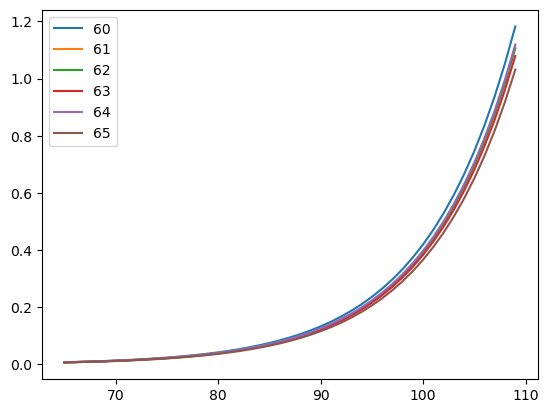

In [138]:
ages = np.arange(65,110)
claim_ages = [60,61,62,63,64,65]
plt.figure()
for c in claim_ages:
	hxs = [hx(t,c,1940,gamma,beta) for t in ages]
	plt.plot(ages,hxs,label=str(c))
plt.legend()
plt.show()

In [139]:
def sx(age, claim_age, cohort, gamma, beta):
	t = age - 65
	base = np.exp(beta[0])
	i = 1
	for c in range(60,66):
		if claim_age==c:
			base *= np.exp(beta[i])
			exit 
		i +=1 
	i = 7
	for b in [1925,1930,1935,1940,1945,1950]:
		if cohort==b: 
			base *= np.exp(beta[i])
			exit 
		i +=1 	
	return np.exp(-base/gamma*(np.exp(gamma*t)-1))

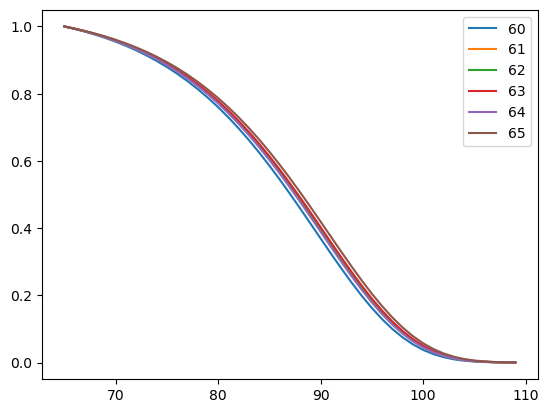

In [140]:
ages = np.arange(65,110)
claim_ages = [60,61,62,63,64,65]
plt.figure()
exs = []
for c in claim_ages:
	sxs = [sx(t,c,1950,gamma,beta) for t in ages]
	exs.append(np.sum(sxs))
	plt.plot(ages,sxs,label=str(c))
plt.legend()
plt.show()

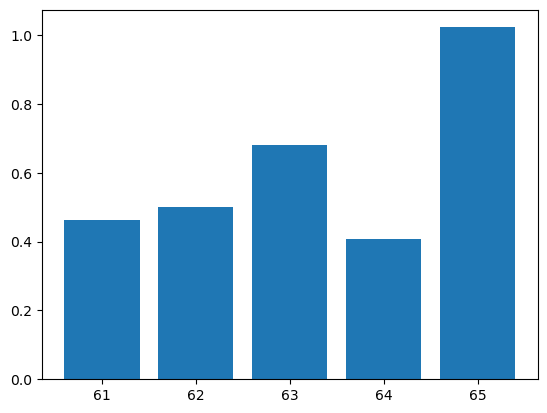

In [141]:
diff = exs[1:] - exs[0]
plt.figure()
plt.bar(claim_ages[1:],diff)
plt.show()

In [142]:
sxs = [sx(t,60,1950,gamma,beta) for t in ages]
rates = np.arange(1,6)/100.0

In [143]:
def v(rate,claim_age,cohort,gamma,beta):
	sxs = [sx(t,claim_age,cohort,gamma,beta) for t in ages]
	return np.sum([s*np.exp(-rate*t) for t,s in enumerate(sxs)])

In [144]:
vs = []
for c in claim_ages:
	vs.append(v(0.03,c,1950,gamma,beta))

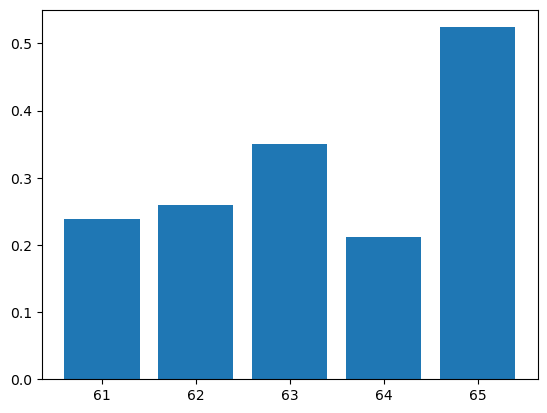

In [145]:
diff = vs[1:]-vs[0]
plt.figure()
plt.bar(claim_ages[1:],diff)
plt.show()

In [170]:
def sx(age, claim_age, cohort, gamma, beta):
	t = age - 60
	base = np.exp(beta[0] - gamma*5)
	i = 1
	for c in range(60,66):
		if claim_age==c:
			base *= np.exp(beta[i]) 
		i +=1 
	i = 7
	for b in [1925,1930,1935,1940,1945,1950]:
		if cohort==b: 
			base *= np.exp(beta[i])
		i +=1 	
	return np.exp(-base/gamma*(np.exp(gamma*t)-1))

In [171]:
ages = np.arange(60,120)
sxs = [sx(t,60,1950,gamma,beta) for t in ages]
np.sum(sxs)

26.14248735970421

In [172]:
def a(claim_age,tau):
	return 1 + tau*(claim_age-60)

In [177]:
def v(rate,tau,age,claim_age,cohort,gamma,beta):
	sxs = [sx(t,age,cohort,gamma,beta) for t in ages]
	return np.sum([s*np.exp(-rate*t)*(claim_age<=(age+t))*a(claim_age,tau) for t,s in enumerate(sxs)])

In [190]:
beta_p = np.copy(beta)
beta_p[1] *= 5

In [191]:
beta_p

array([-5.03291158,  0.68357348,  0.07462777,  0.06939452,  0.04544649,
        0.08185   ,  0.        ,  0.21568057,  0.12717083,  0.03143374,
        0.        , -0.04666633, -0.08848756])

In [200]:
[v(0.06,0.1,60,c,1950,gamma,beta) for c in claim_ages]

[12.939658057096395,
 13.133623862806033,
 13.202072089968398,
 13.15918382700384,
 13.018063996712385,
 12.79082664831201]